In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### So that we dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
# BRAINSTORMING
    
# #    1)  reveiws_list column has rated and we can extract the rating from there!!  - WE HAVE A RATE COLUMN SEPARATELY
# #    2) we can separate and get the most common cusisines
# #    3) Some restaurants have multiple phone numbers seoarated by /r/n - NOT USEFUL IN ANALYSIS
# #    4) URL IS different and unique so can be made index bu filter operations writing will take time
# #    5) we can check if any restaurant has the same name 
# #    6) we can aslso chcek the best restaurants by rest_type 
# #    7) menu item is just menu of a restuarnt and we can check for any speicif dishes - MOSTLY USELESS
# #    8) restaurants which are best performing as per rating and 3 segments of cost . we can create cost segments for 2 peopple
# #     check max and min of cost for 2
# #    9) the location can be picked accoridng to lat and lan and categorised into 4 groups north south east west 
# #    10) the same can be done by cities : first number of restaurants in a city 
# #       , then city by average rating of all restaurants in that city , and finally by the average cost for 2 in that city 
# #        , and categorize city into 4 segments : medium , cheap and expensive
       
    
    

Cleaning and Transforming with Exploration

In [5]:
df.describe() ## votes is the only numerical column with discrete values


votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [6]:
df.shape

(51717, 17)

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
## create a list of columns where there are null vlaues

missing_values_columns = [i for i in df.columns if df[i].isna().sum()>0 ]

missing_values_columns

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [11]:
## find percentage of null values in all those above mentioned columns

for column in missing_values_columns:
    print("The percentage of missing values in {} column is {}".format(column,round(df[column].isna().sum()/len(df[column])*100,2)))

The percentage of missing values in rate column is 15.03
The percentage of missing values in phone column is 2.34
The percentage of missing values in location column is 0.04
The percentage of missing values in rest_type column is 0.44
The percentage of missing values in dish_liked column is 54.29
The percentage of missing values in cuisines column is 0.09
The percentage of missing values in approx_cost(for two people) column is 0.67


Rate column values is missing for 15 percent of the restaurants , which is substantial and these records dont contribute much


In [12]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df["rate"].replace("NEW","0",inplace=True)

In [14]:
df["rate"].replace("-","0",inplace=True)

In [15]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
## removing the nan values 

df.dropna(axis = "index",subset=["rate"] ,inplace = True)

In [17]:
def split_rating(string):
    return string.split("/")[0]

In [18]:
df["rate"]=df["rate"].apply(split_rating)

In [19]:
df["rate"]=df["rate"].astype(float)

In [20]:
## missing and wrong vlaues in rate column were delat with and now we use decsribe to read some stats
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

EXPLORATION AND ANALYSIS


## TOP restaurants by rating

In [21]:
restaurants_by_rating = df.groupby("name")["rate"].mean().reset_index()
restaurants_by_rating.column = ["restaurant","rate"]
restaurants_by_rating.head(15)

name      rate
0                           #FeelTheROLL  3.400000
1                             #L-81 Cafe  3.900000
2                                #refuel  3.700000
3                               1000 B.C  3.200000
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
5             11 to 11 Express Biriyanis  3.500000
6                     1131 Bar + Kitchen  4.500000
7              12th Main - Grand Mercure  4.100000
8                          1441 Pizzeria  4.100000
9                         1522 - The Pub  4.212000
10                    154 Breakfast Club  4.000000
11                     1722 Urban Bistro  4.100000
12                          18+ Ice Cafe  3.500000
13                                  1947  4.021429
14                      1980s Games Cafe  3.400000

<Axes: xlabel='name'>

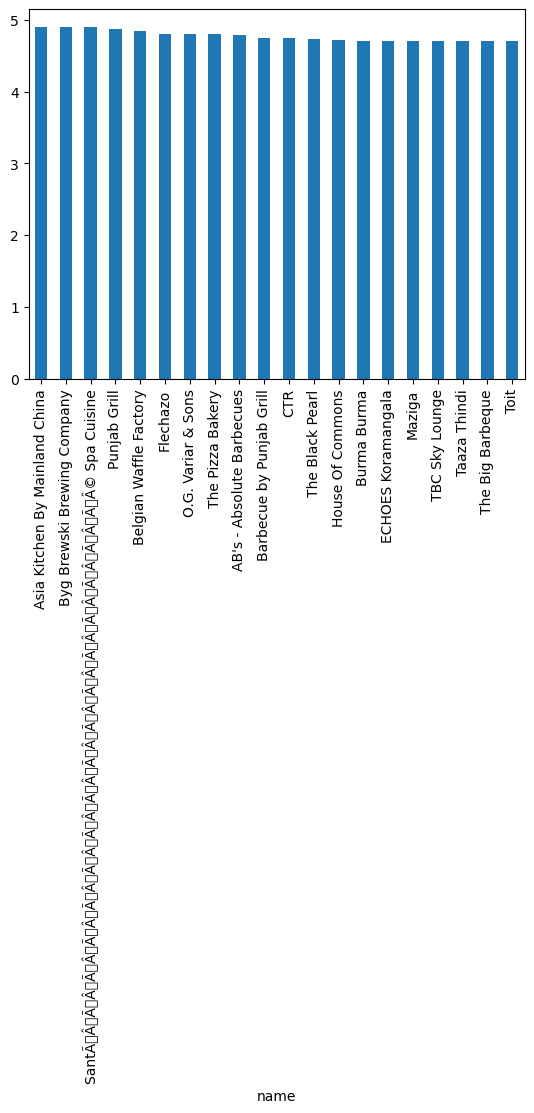

In [22]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()



## Rating distribution 

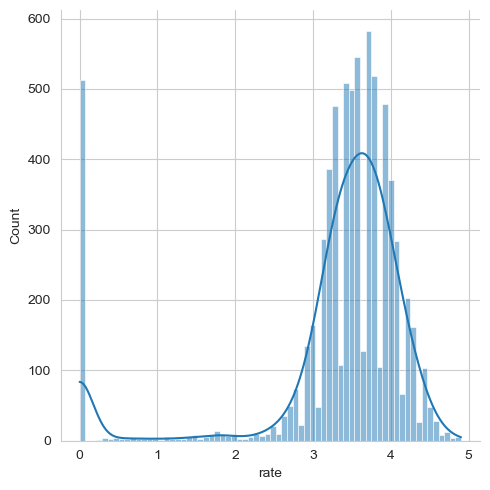

In [23]:
sns.set_style(style='whitegrid')
sns.displot(restaurants_by_rating["rate"],kde= True)

## Top restaurants by votes

In [24]:
restaurants_by_votes = round(df.groupby("name")["votes"].max().sort_values(ascending = False).nlargest(15),2).reset_index()

In [25]:
restaurants_by_votes
## now even for restuarnts with multiple branches we have sleected the one which was voted the highest and now we will make
## a join to get the location and city for analysis to display accurate information


name  votes
0   Byg Brewski Brewing Company  16832
1                          Toit  14956
2                      Truffles  14726
3     AB's - Absolute Barbecues  12121
4               The Black Pearl  10550
5                   Big Pitcher   9300
6                        Onesta   9085
7         Arbor Brewing Company   8419
8             Empire Restaurant   8304
9                Prost Brew Pub   7871
10         Church Street Social   7584
11                         Hoot   7330
12              Barbeque Nation   7270
13                Meghana Foods   7238
14                     Flechazo   7154

Text(0.5, 0, 'Votes')

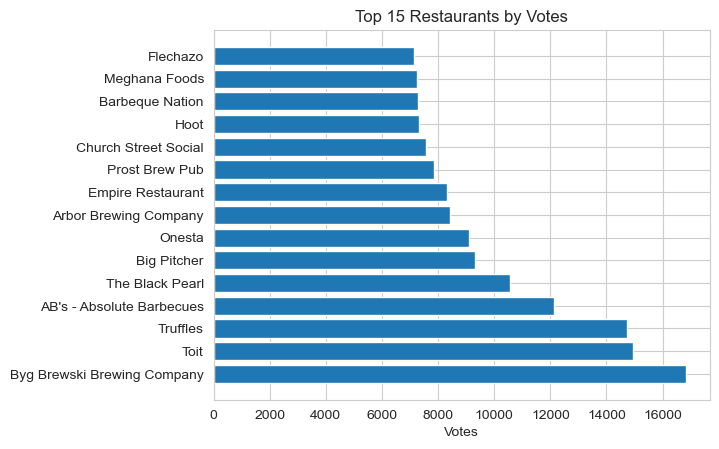

In [26]:

names = restaurants_by_votes["name"]
votes = restaurants_by_votes["votes"]


plt.barh(names,votes)
plt.title("Top 15 Restaurants by Votes")
plt.xlabel("Votes")



## Online delivery option 

In [27]:
slices = df["online_order"].value_counts()
labels = df["online_order"].value_counts().index

([<matplotlib.patches.Wedge at 0x2a300e7f490>,
 [Text(-0.481488774517003, 0.9890240442042423, 'Yes'),
  Text(0.5252605823084886, -1.0789352717716423, 'No')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.42%'),
  Text(0.30640200634661835, -0.629378908533458, '35.58%')])

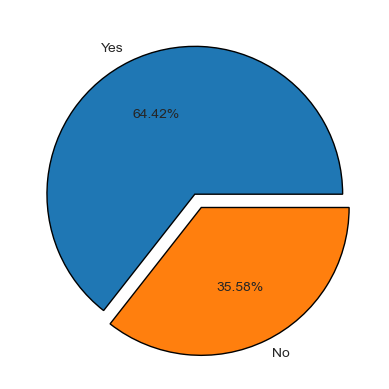

In [28]:
plt.pie(slices,labels=labels,explode = [0,0.1],autopct ="%1.2f%%",wedgeprops={"edgecolor":"black"})

64 percent of restaurants have online ordering facility

## Table booking Option

In [29]:
count = df["book_table"].value_counts()
label = df["book_table"].value_counts().index

([<matplotlib.patches.Wedge at 0x2a301670790>,
 [Text(-0.9856961240827233, 0.4882654513359477, 'Yes'),
  Text(1.0753048626356982, -0.5326532196392153, 'No')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.36%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.64%')])

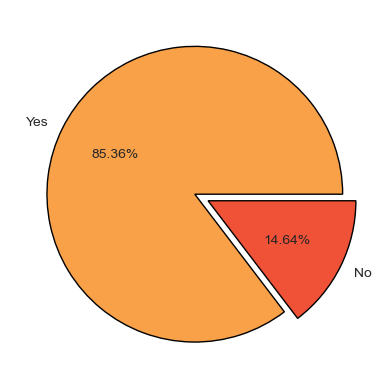

In [30]:
plt.pie(count,labels=labels,explode = [0,0.1],autopct ="%1.2f%%",wedgeprops={"edgecolor":"black"},colors = ["#f9a148","#ef5236"])

## How many types of restaurants with count 

In [31]:
## 
df["rest_type"].value_counts()

rest_type
Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [32]:
df["rest_type"].isna().sum()

151

In [33]:
df[df["rest_type"].isna()==True]

## here I can see that there are sme restaurants with naan value but they have rating and other information so dropping
## would not be wise 

url  \
999    https://www.zomato.com/bangalore/mughlai-kitch...   
1300   https://www.zomato.com/bangalore/eat-joy-resta...   
1376   https://www.zomato.com/bangalore/kababish-rest...   
1637   https://www.zomato.com/bangalore/ammis-biryani...   
2044   https://www.zomato.com/bangalore/ammis-biryani...   
...                                                  ...   
49916  https://www.zomato.com/bangalore/parathas-kitc...   
49956  https://www.zomato.com/bangalore/new-andhra-sp...   
50318  https://www.zomato.com/bangalore/special-birya...   
50838  https://www.zomato.com/bangalore/vijayawada-he...   
51195  https://www.zomato.com/bangalore/special-birya...   

                                                 address  \
999    77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...   
1300   21, Saifee Apartment, 5th Cross, 22nd Main, Ne...   
1376            7th Main, 18th Cross NS Palya, 2nd Stage   
1637   3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...   
2044   3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...   
...                                                  ...   
49916  32/1,1st Floor, Next To Kaveri Bank, Bellandur...   
49956  573, Kamakamma, Bellandur Main Road, Bellandur...   
50318  107, Praveen Transport Complex, ITPL Back Gate...   
50838  1, 1st Cross, Ambedkar Nagar, Opposite Royal M...   
51195  107, Praveen Transport Complex, ITPL Back Gate...   

                        name online_order book_table  rate  votes  \
999          Mughlai Kitchen          Yes         No   3.5    269   
1300    Eat & Joy Restaurant          Yes         No   3.0      7   
1376     Kababish Restaurant          Yes         No   3.6     15   
1637          Ammi's Biryani           No         No   2.4    392   
2044          Ammi's Biryani           No         No   2.4    392   
...                      ...          ...        ...   ...    ...   
49916      Paratha's Kitchen          Yes         No   2.8     33   
49956       New Andhra Spicy          Yes         No   3.6     11   
50318  Special Biryani House          Yes         No   3.2    202   
50838     Vijayawada Heights          Yes         No   3.2      8   
51195  Special Biryani House          Yes         No   3.2    202   

                                    phone           location rest_type  \
999    +91 9663197947\r\r\n+91 9986692090                BTM       NaN   
1300                       +91 9945052352           JP Nagar       NaN   
1376       +91 8050732123\r\n00 805074123                BTM       NaN   
1637       +91 9513777152\r\n080 39457777  Bannerghatta Road       NaN   
2044       +91 9513777152\r\n080 39457777  Bannerghatta Road       NaN   
...                                   ...                ...       ...   
49916                      +91 9701246058          Bellandur       NaN   
49956                      +91 9052897378          Bellandur       NaN   
50318      +91 9164859311\n+91 9164871033         Whitefield       NaN   
50838                        080 43747899         Whitefield       NaN   
51195      +91 9164859311\n+91 9164871033         Whitefield       NaN   

                                              dish_liked  \
999                                    Momos, Oreo Shake   
1300                                                 NaN   
1376                                                 NaN   
1637   Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...   
2044   Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...   
...                                                  ...   
49916                                     Paratha, Chole   
49956                                                NaN   
50318                                                NaN   
50838                                                NaN   
51195                                                NaN   

                                                cuisines  \
999                Mughlai, North Indian, Chinese, Momos   
1300                              Fast Food, Finger 

 copying and creating another dataframe for this visualization

In [34]:
df_rest_type = df.copy()

In [35]:
df_rest_type.dropna(axis = "index",subset=["rest_type"] ,inplace = True)

In [36]:
df_rest_type["rest_type"].isna().sum()

0

now the visualization can be made


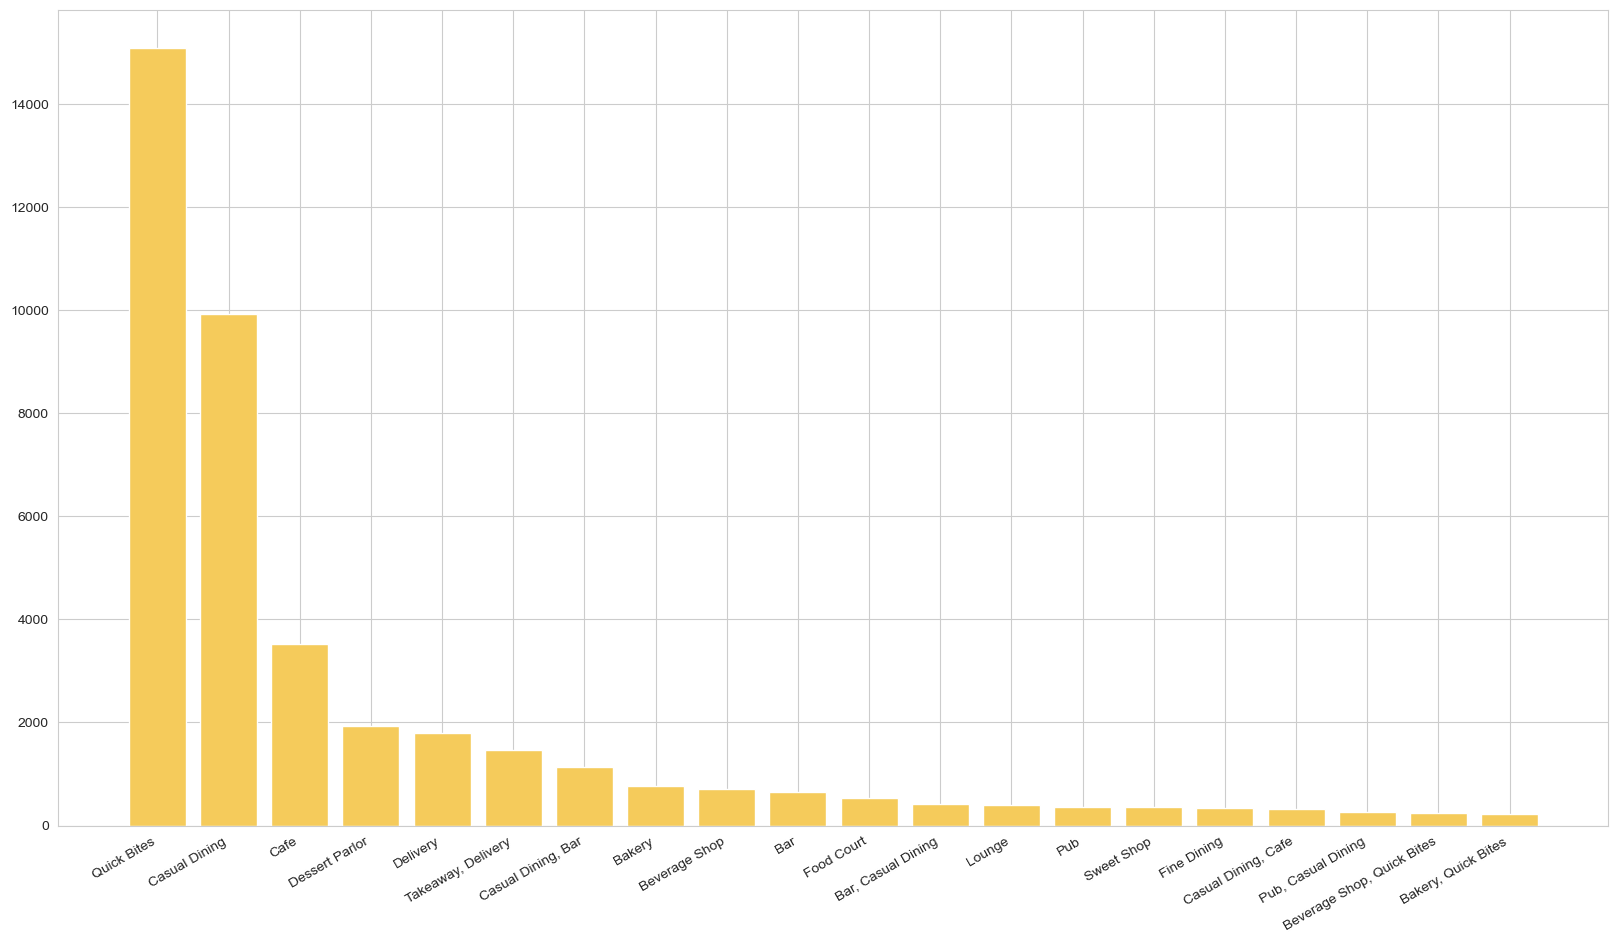

In [37]:
x = df['rest_type'].value_counts().nlargest(20).index
y= df['rest_type'].value_counts().nlargest(20)

plt.figure(figsize=(20,12))

plt.bar(x,y,color ="#f5cb5b")
plt.gcf().autofmt_xdate()


## No of restaurats by different location 

In [38]:
df.groupby("location")["name"].size().sort_values(ascending = False)

location
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
                         ... 
West Bangalore              5
Yelahanka                   5
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: name, Length: 92, dtype: int64

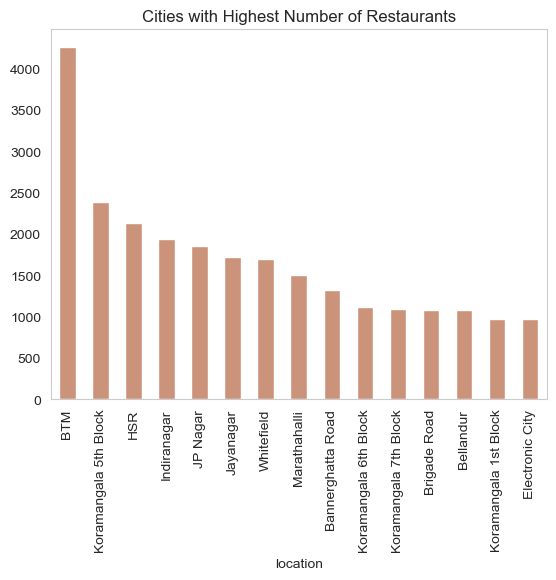

In [39]:
df.groupby("location")["name"].size().sort_values(ascending = False).nlargest(15).plot(kind = "bar",color="#ca937a")
plt.title("Cities with Highest Number of Restaurants")

plt.style.use("fivethirtyeight")
plt.grid(None)

## Most famous cuisines in Banglore restaurants

In [40]:
df["cuisines"]

## there is "north indian" and " north indian" and we need to check and replace such errors

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
51709                      North Indian, Continental
51711    Andhra, South Indian, Chinese, North Indian
51712                                    Continental
51715                                    Finger Food
51716         Finger Food, North Indian, Continental
Name: cuisines, Length: 43942, dtype: object

In [41]:
## now here we see different cuisines combned for one restaurant so :

from collections import Counter

In [42]:
cuisine_counter = Counter()

In [43]:
cuisines = df["cuisines"]

In [44]:
for i in cuisines:
    cuisine_counter.update(i.split(", "))
## it shows error but it is added


AttributeError: 'float' object has no attribute 'split'

In [45]:
cuisines_name =[]
cuisines_count=[]


for item in cuisine_counter.most_common(15):
    cuisines_name.append(item[0])
    cuisines_count.append(item[1])
    
    

In [46]:
cuisines_name


['North Indian',
 'Chinese',
 'South Indian',
 'Fast Food',
 'Cafe',
 'Biryani',
 'Beverages',
 'Italian',
 'Desserts',
 'Street Food',
 'Continental',
 'Pizza',
 'Ice Cream',
 'Rolls',
 'Seafood']

In [47]:
cuisines_count

[145, 129, 103, 97, 52, 47, 46, 38, 36, 34, 23, 22, 19, 16, 16]

In [48]:
cuisines_count.reverse()
cuisines_name.reverse()

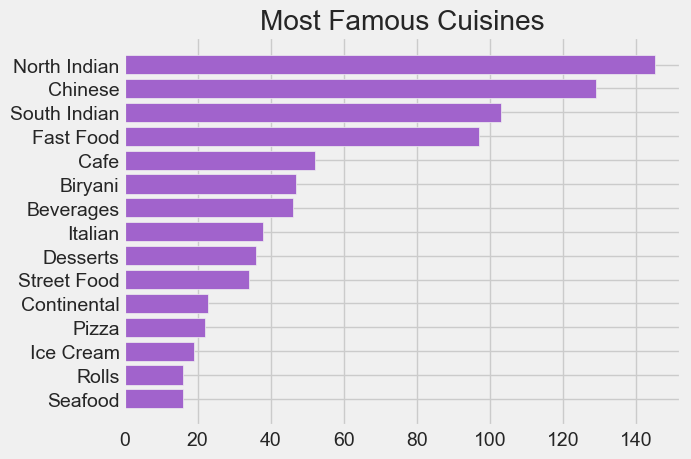

In [49]:
plt.barh(cuisines_name,cuisines_count,color="#a163cc")
plt.title("Most Famous Cuisines")
plt.style.use("fivethirtyeight")

North Indian, Chinese and South Indian dominate the market 

Interesting Observation : Although Banglore is in south part of the country,
still its restaurants are dominated by North Indian Cuisines.


##  Median or average cost for 2 people in Banglore 

In [50]:
df.rename(columns = {"approx_cost(for two people)":"cost for two"},inplace = True)

In [51]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost for two', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [52]:
df["cost for two"].isna().sum()

252

In [53]:
df_median_cost = df.copy()

In [54]:
df_median_cost["cost for two"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [55]:
df_median_cost.dropna(axis = "index",subset =["cost for two"],inplace = True)

In [56]:
## there are some commas present as well so we need to remove them as well

In [57]:
def remove_commas(s):
    return s.replace(",","")

In [58]:
df_median_cost["cost for two"] =df_median_cost["cost for two"].apply(remove_commas)

In [59]:
df_median_cost["cost for two"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [60]:
df_median_cost["cost for two"] =df_median_cost["cost for two"].astype(int)

In [61]:
df_median_cost["cost for two"].mean()

594.2702220187685

In [62]:
df_median_cost["cost for two"].median()

450.0

The median cost for two people eating is 450 whereas the mean cost is 594 . The difference is tehre duw to some restaurants having subtantially large cost for 2 

## COST Dustribution 

<Axes: xlabel='cost for two', ylabel='Density'>

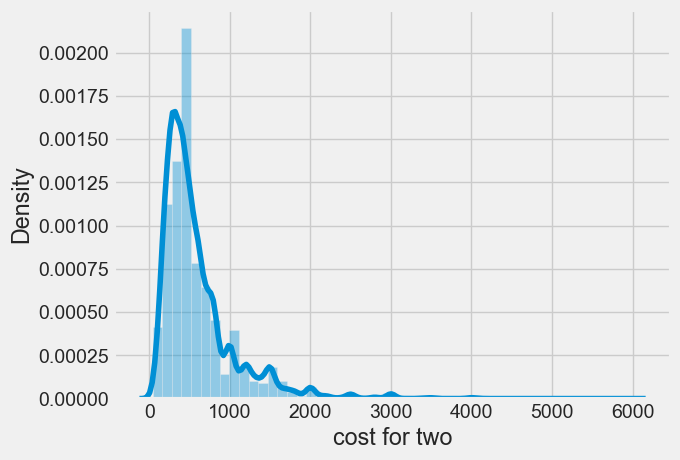

In [63]:
sns.distplot(df_median_cost["cost for two"])

 Most of the restaurant pricings are under 1000 , therefor they are more budget friendly and affordable.

## Cost Vs Rating Analysis

In [64]:
## here for above analysis I did not remove rows in the dataset where cost and ratings were null
## I created another copy and did my analysis but here we will remove rows where both is null

df[["cost for two","rate"]].isna().sum()

cost for two    252
rate              0
dtype: int64

In [65]:
df_median_cost[["cost for two","rate"]].isna().sum()

cost for two    0
rate            0
dtype: int64

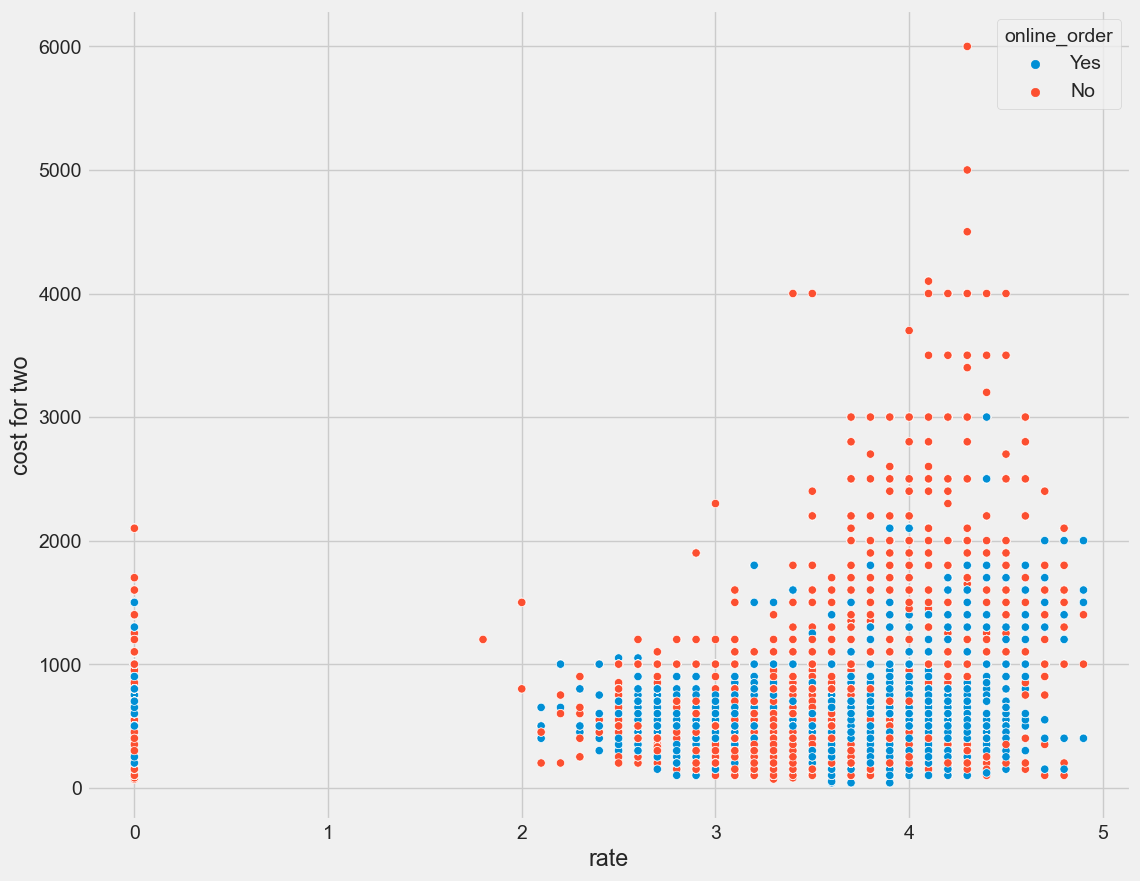

In [66]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="rate" ,y = "cost for two", hue ="online_order" ,data =df_median_cost )
plt.show()

Here we can easily see :

    1) Most of the highly rated restaurants are budget friendly ( under 1000)
    2) As the cost of Two increases , the restaurants stop delivering online.

## Difference of cost between restuarants accepting Online Orders or not :

<Axes: xlabel='online_order', ylabel='cost for two'>

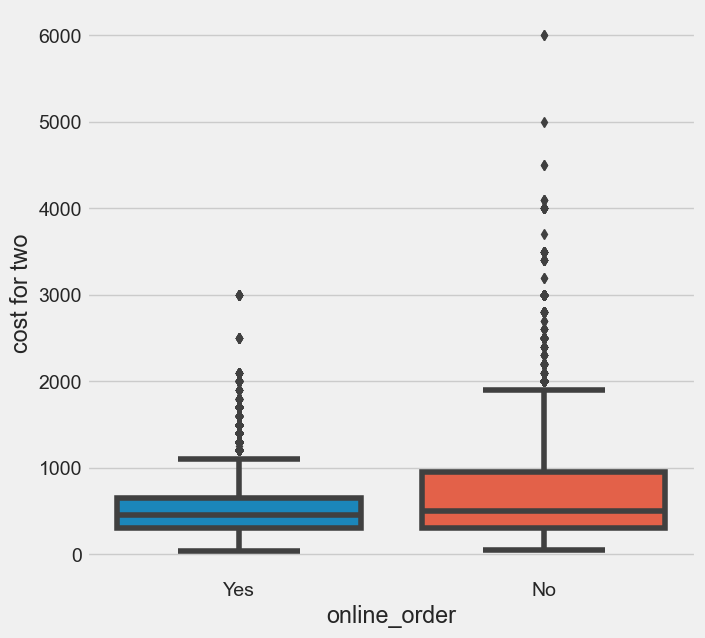

In [67]:
plt.figure(figsize=(7,7))
sns.boxplot(x="online_order",y="cost for two",data = df_median_cost)

Observations :
    1) Restaurants with online orders have lower prices than resturants not having online orders
    

## Difference of rating between restuarants accepting Online Orders or not :

<Axes: xlabel='online_order', ylabel='rate'>

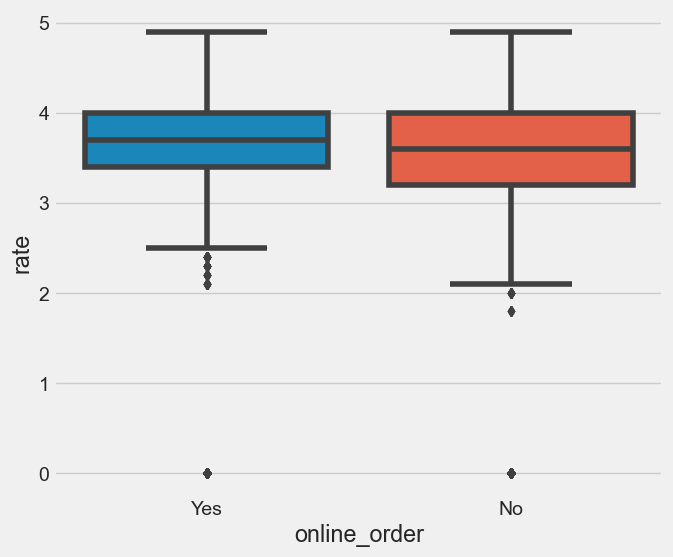

In [68]:
plt.figure(figsize=(7,6))
sns.boxplot(x="online_order",y="rate",data = df_median_cost)


Resturants with online orders are generally rated better . This is because of the app asking about the rating to the food that was just ordered.

## Top 10 Most expensive Restaurants

In [69]:
restaurants_by_cost = round(df_median_cost.groupby("name")["cost for two"].max().sort_values(ascending = False).nlargest(10),2).reset_index()

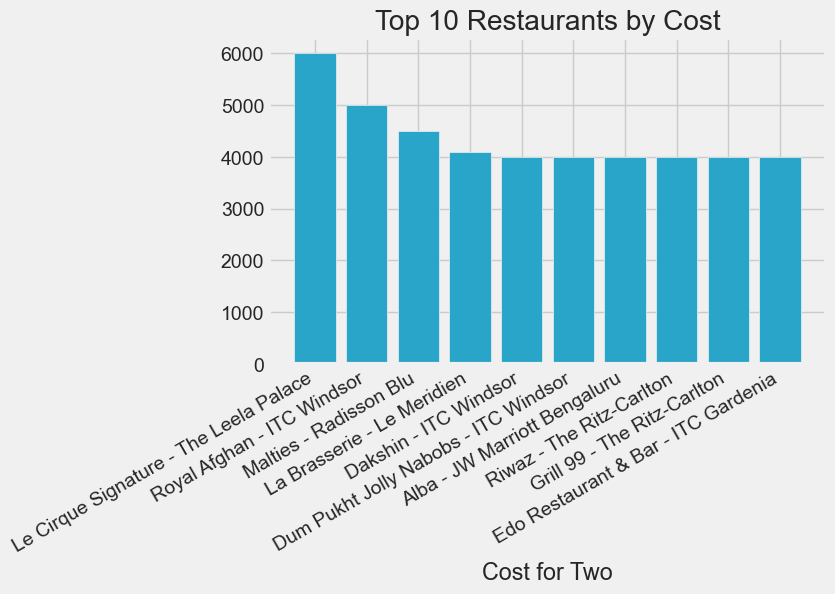

In [70]:
names = restaurants_by_cost["name"]
cost = restaurants_by_cost["cost for two"]


plt.bar(names,cost,color="#28a5c9")
plt.title("Top 10 Restaurants by Cost")
plt.xlabel("Cost for Two")
plt.gcf().autofmt_xdate()

## Top 10 Cheapest Restaurants - fix the chart


In [71]:
restaurants_by_cost_min = df_median_cost.groupby("name")["cost for two"].min().nsmallest(10).reset_index()

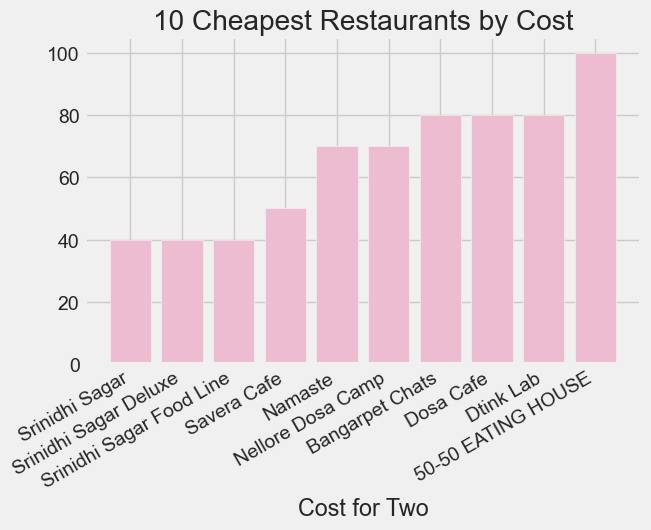

In [72]:
names = restaurants_by_cost_min["name"]
cost = restaurants_by_cost_min["cost for two"]


plt.bar(names,cost,color="#eebcd0")
plt.title("10 Cheapest Restaurants by Cost")
plt.xlabel("Cost for Two")
plt.gcf().autofmt_xdate()

In [73]:
df_median_cost.groupby("name")["cost for two"].min().nsmallest(10).reset_index()

name  cost for two
0            Srinidhi Sagar            40
1     Srinidhi Sagar Deluxe            40
2  Srinidhi Sagar Food Line            40
3               Savera Cafe            50
4                   Namaste            70
5         Nellore Dosa Camp            70
6           Bangarpet Chats            80
7                 Dosa Cafe            80
8                 Dtink Lab            80
9        50-50 EATING HOUSE           100

## Top 10 Best Budget Restaurants ( rating > 4 and cost <=500)

In [74]:
budget_filter = (df_median_cost["cost for two"]<=500) & (df_median_cost["rate"]>=4)

<Axes: xlabel='name'>

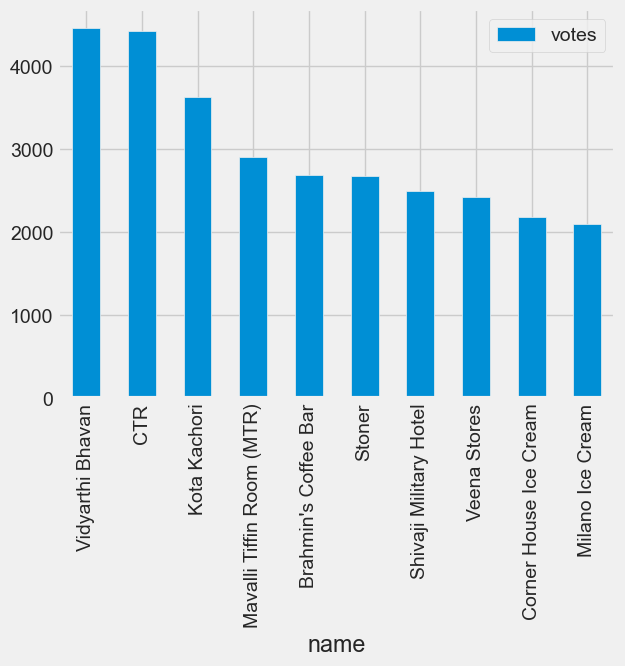

In [75]:
df_median_cost.loc[budget_filter].groupby("name")[["votes"]].max().sort_values(by ="votes",ascending = False).head(10).plot(kind="bar")

These are the top 10 restaurants all filtered by highest votes who have budget under 500 and ratings over 4 

## Location by Number of Budget restaurants

In [76]:
df_new = df_median_cost.loc[budget_filter]
# len(location_df["name"].unique())
# type(location_df)



## here we will have multiple records for the same restaurants 

In [77]:
location=[]
total=[]

for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [78]:
len(location)

68

In [79]:
len(count)

2

In [80]:
location_df = pd.DataFrame(zip(location,total))
location_df.columns = ["location","count"]
location_df.set_index('location',inplace=True)




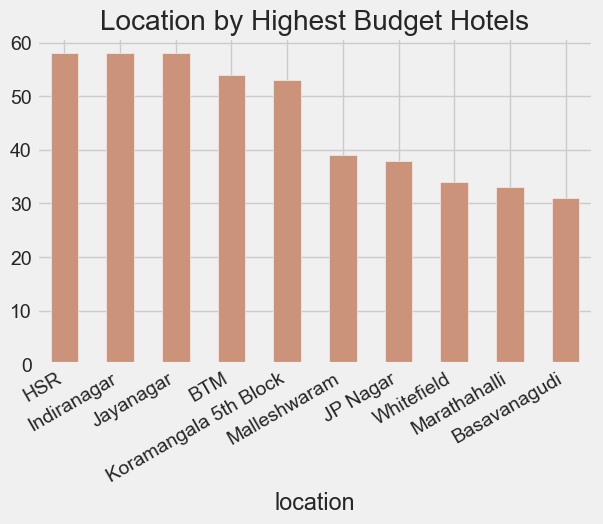

In [81]:
location_df["count"].nlargest(10).plot(kind = "bar",color = "#CA937A")
plt.title("Location by Highest Budget Hotels")
plt.gcf().autofmt_xdate()




#### TO FIND THE NAME OF THOSE RESTAURANTS :

In [82]:
location = []
names = []


for loc,group in df_new.groupby("location"):
    location.append(loc)
    names.append(group["name"].unique())
    

In [83]:
df_names = pd.DataFrame(zip(location,names))
df_names.columns = ["location","name_of_restaurants"]

In [84]:
df_names.head()

location                                name_of_restaurants
0                BTM  [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
1       Banashankari  [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
2          Banaswadi  [Pooja Dosa Camp, Corner House Ice Cream, The ...
3  Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
4       Basavanagudi  [Kabab Magic, Sri Guru Kottureshwara Davangere...

## Finding best Budget Restaurants in any Location 

In [85]:
def best_budget_location(location,rest_type,budget):
    filter_applied = (df_median_cost["location"] == location) & (df_median_cost["rest_type"] == rest_type) & (df_median_cost["rate"] >= 4) & (df_median_cost["cost for two"] >= budget)
    return df_median_cost.loc[filter_applied]["name"].unique()

In [86]:
best_budget_location('BTM',"Quick Bites",600)

array(['Midnight Mania', 'Mojo Pizza - 2X Toppings',
       'Royal Biryani Kitchen'], dtype=object)

### GEOSPATIAL ANALYSIS 

In [87]:
from  geopy.geocoders import Nominatim

In [88]:
nom = Nominatim(user_agent="app")

In [89]:
nom.geocode("Vasundhara Enclave Delhi").lom

AttributeError: 'Location' object has no attribute 'lom'

it is working fine so we can proceeed

In [104]:
len(df_median_cost["location"].unique())

92

In [105]:
locations = pd.DataFrame(df_median_cost["location"].unique())
locations

0
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
87      Sahakara Nagar
88           Jalahalli
89          Nagarbhavi
90              Peenya
91            KR Puram

[92 rows x 1 columns]

In [106]:
locations.rename(columns = {0:"name"},inplace = True)

In [107]:
locations["location"] = "Banglore" + " " + locations["name"]
    

In [108]:
locations

name                     location
0         Banashankari        Banglore Banashankari
1         Basavanagudi        Banglore Basavanagudi
2          Mysore Road         Banglore Mysore Road
3            Jayanagar           Banglore Jayanagar
4   Kumaraswamy Layout  Banglore Kumaraswamy Layout
..                 ...                          ...
87      Sahakara Nagar      Banglore Sahakara Nagar
88           Jalahalli           Banglore Jalahalli
89          Nagarbhavi          Banglore Nagarbhavi
90              Peenya              Banglore Peenya
91            KR Puram            Banglore KR Puram

[92 rows x 2 columns]

In [109]:
# locations.drop("geo",axis = 1,inplace = True)
locations

name                     location
0         Banashankari        Banglore Banashankari
1         Basavanagudi        Banglore Basavanagudi
2          Mysore Road         Banglore Mysore Road
3            Jayanagar           Banglore Jayanagar
4   Kumaraswamy Layout  Banglore Kumaraswamy Layout
..                 ...                          ...
87      Sahakara Nagar      Banglore Sahakara Nagar
88           Jalahalli           Banglore Jalahalli
89          Nagarbhavi          Banglore Nagarbhavi
90              Peenya              Banglore Peenya
91            KR Puram            Banglore KR Puram

[92 rows x 2 columns]

In [110]:
lat = []
lon = []


for loc in locations["name"]:
    loc= nom.geocode(loc)
    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)

In [111]:
locations["lat"] = lat
locations["lon"] = lon
locations.head()


name                     location        lat        lon
0        Banashankari        Banglore Banashankari  15.887678  75.704678
1        Basavanagudi        Banglore Basavanagudi  13.834591  75.733936
2         Mysore Road         Banglore Mysore Road  12.946662  77.530090
3           Jayanagar           Banglore Jayanagar  27.349301  95.315941
4  Kumaraswamy Layout  Banglore Kumaraswamy Layout  12.906768  77.559502

In [112]:
locations.to_csv("zomato_locations.csv",index = False)


In [113]:
# df_new["Coordinates"] = df_new["location"].apply(nom.geocode)

## here it is taking too muc time so the best option is to create a new table and do it !!

we have the different coordinates for all the locations now 

In [114]:
restaurant_locations = pd.DataFrame(df["location"].value_counts())

In [115]:
df["location"].value_counts()

location
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
                         ... 
West Bangalore              5
Yelahanka                   5
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

In [116]:
restaurant_locations.reset_index(inplace = True)

In [117]:
restaurant_locations.columns = ["name","count"]

In [118]:
restaurant_locations

name  count
0                     BTM   4261
1   Koramangala 5th Block   2381
2                     HSR   2128
3             Indiranagar   1936
4                JP Nagar   1849
..                    ...    ...
87         West Bangalore      5
88              Yelahanka      5
89   Rajarajeshwari Nagar      2
90             Nagarbhavi      1
91                 Peenya      1

[92 rows x 2 columns]

 now we can combine the two dataframes 

In [119]:
locations.head()

name                     location        lat        lon
0        Banashankari        Banglore Banashankari  15.887678  75.704678
1        Basavanagudi        Banglore Basavanagudi  13.834591  75.733936
2         Mysore Road         Banglore Mysore Road  12.946662  77.530090
3           Jayanagar           Banglore Jayanagar  27.349301  95.315941
4  Kumaraswamy Layout  Banglore Kumaraswamy Layout  12.906768  77.559502

In [120]:
restaurant_locations.head()

name  count
0                    BTM   4261
1  Koramangala 5th Block   2381
2                    HSR   2128
3            Indiranagar   1936
4               JP Nagar   1849

In [121]:
len(locations)

92

In [122]:
len(restaurant_locations)

92

In [123]:
restaurant_locations = restaurant_locations.merge(locations,how = "left",on = "name")

In [124]:
restaurant_locations.isna().sum()

name        0
count       0
location    0
lat         1
lon         1
dtype: int64

In [125]:
restaurant_locations.dropna(inplace = True)

In [126]:
restaurant_locations

name  count                        location        lat  \
0                     BTM   4261                    Banglore BTM  45.954851   
1   Koramangala 5th Block   2381  Banglore Koramangala 5th Block  12.934843   
2                     HSR   2128                    Banglore HSR  29.152347   
3             Indiranagar   1936            Banglore Indiranagar  17.756964   
4                JP Nagar   1849               Banglore JP Nagar  12.265594   
..                    ...    ...                             ...        ...   
87         West Bangalore      5         Banglore West Bangalore  13.009652   
88              Yelahanka      5              Banglore Yelahanka  13.100698   
89   Rajarajeshwari Nagar      2   Banglore Rajarajeshwari Nagar  12.927441   
90             Nagarbhavi      1             Banglore Nagarbhavi  12.952707   
91                 Peenya      1                 Banglore Peenya  13.032942   

           lon  
0  -112.496595  
1    77.618977  
2    75.724580  
3    77.188905  
4    76.646540  
..         ...  
87   77.553054  
88   77.596345  
89   77.515522  
90   77.520943  
91   77.527325  

[91 rows x 5 columns]

now this above dataframe can be used to produce a heatmap 

In [127]:
!pip install folium --quiet

import folium
from folium.plugins import HeatMap
basemap=folium.Map(location = [12.974019927472055, 77.5924689679356],zoom_start = 13)

In [128]:
basemap

In [129]:

restaurant_locations[["lat","lon","count"]].values

array([[ 4.59548506e+01, -1.12496595e+02,  4.26100000e+03],
       [ 1.29348429e+01,  7.76189768e+01,  2.38100000e+03],
       [ 2.91523467e+01,  7.57245798e+01,  2.12800000e+03],
       [ 1.77569637e+01,  7.71889052e+01,  1.93600000e+03],
       [ 1.22655944e+01,  7.66465404e+01,  1.84900000e+03],
       [ 2.73493013e+01,  9.53159407e+01,  1.71800000e+03],
       [ 5.35533682e+01, -2.29690190e+00,  1.69300000e+03],
       [ 1.29552572e+01,  7.76984163e+01,  1.50300000e+03],
       [ 1.29310954e+01,  7.76005347e+01,  1.32400000e+03],
       [ 1.29390255e+01,  7.76238477e+01,  1.11100000e+03],
       [ 1.29364846e+01,  7.76134783e+01,  1.08900000e+03],
       [ 6.08015660e+00, -1.66233000e-02,  1.08400000e+03],
       [ 1.29310319e+01,  7.76782471e+01,  1.07800000e+03],
       [ 1.29277245e+01,  7.76327822e+01,  9.65000000e+02],
       [ 1.28436448e+01,  7.76686835e+01,  9.64000000e+02],
       [ 1.29203873e+01,  7.76654346e+01,  9.19000000e+02],
       [ 1.29778793e+01,  7.76246697e+01

In [130]:
restaurant_locations[["lat","lon","count"]].values.ndim

## this is a 2d numpy array 

2

In [131]:
HeatMap(restaurant_locations[["lat","lon","count"]].values,zoom=15,radius=15).add_to(basemap)

In [132]:
basemap

1) MOST of the restaurants are in the central region of Banglore 
2) The density decreases as we move away from the centre
3) Therefore portential entrepreneurs should look for a central location.

## Heatmap of Only North Indian Restaurants 

In [143]:
df = df_median_cost.copy()

In [ ]:
north_indian_filter = df["cuisines"] == "North Indian"

In [158]:
df[north_indian_filter].head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    cost for two                                       reviews_list menu_item  \
5            600  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50           450  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72           150  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87           200  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94           600  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [159]:
basemap_north = folium.Map(location = [12.97,77.59],zoomstart = 15)

In [164]:
north_india = df[north_indian_filter].groupby("location")["url"].nunique().reset_index()

In [166]:
north_india.columns = ["name","count"]

In [167]:
north_india

name  count
0                             BTM    262
1                    Banashankari     35
2                       Banaswadi      9
3               Bannerghatta Road     60
4                    Basavanagudi     17
..                            ...    ...
58  Varthur Main Road, Whitefield      3
59                  Vasanth Nagar     12
60                     Whitefield    146
61                  Wilson Garden     37
62                    Yeshwantpur      3

[63 rows x 2 columns]

In [168]:
locations

name                     location        lat        lon
0         Banashankari        Banglore Banashankari  15.887678  75.704678
1         Basavanagudi        Banglore Basavanagudi  13.834591  75.733936
2          Mysore Road         Banglore Mysore Road  12.946662  77.530090
3            Jayanagar           Banglore Jayanagar  27.349301  95.315941
4   Kumaraswamy Layout  Banglore Kumaraswamy Layout  12.906768  77.559502
..                 ...                          ...        ...        ...
87      Sahakara Nagar      Banglore Sahakara Nagar  17.256993  80.153666
88           Jalahalli           Banglore Jalahalli  11.991779  76.506629
89          Nagarbhavi          Banglore Nagarbhavi  12.952707  77.520943
90              Peenya              Banglore Peenya  13.032942  77.527325
91            KR Puram            Banglore KR Puram  13.007516  77.695935

[92 rows x 4 columns]

In [169]:
# joining both to generate a heatmap 

north_india = north_india.merge(locations,how = "left",on = "name")

In [181]:
north_india.sort_values(by ="count",ascending = False)

name  count                     location        lat  \
0                  BTM    262                 Banglore BTM  45.954851   
60          Whitefield    146          Banglore Whitefield  53.553368   
24            JP Nagar    135            Banglore JP Nagar  12.265594   
6            Bellandur    131           Banglore Bellandur  12.931032   
19                 HSR    117                 Banglore HSR  29.152347   
..                 ...    ...                          ...        ...   
45            RT Nagar      2            Banglore RT Nagar  13.022720   
20              Hennur      2              Banglore Hennur  13.025809   
14      East Bangalore      2      Banglore East Bangalore  12.850432   
43     North Bangalore      1     Banglore North Bangalore  12.988157   
5   Basaveshwara Nagar      1  Banglore Basaveshwara Nagar  12.991180   

           lon  
0  -112.496595  
60   -2.296902  
24   76.646540  
6    77.678247  
19   75.724580  
..         ...  
45   77.595715  
20   77.630507  
14   77.660140  
43   77.622600  
5    77.544892  

[63 rows x 5 columns]

In [171]:
HeatMap()

name        0
count       0
location    0
lat         0
lon         0
dtype: int64

In [175]:
## this creates a numpy 2d array or a list of lists needed for the heatmap 

north_india[["lat","lon","count"]].values

array([[ 4.59548506e+01, -1.12496595e+02,  2.62000000e+02],
       [ 1.58876779e+01,  7.57046777e+01,  3.50000000e+01],
       [ 1.30141618e+01,  7.76518539e+01,  9.00000000e+00],
       [ 1.29310954e+01,  7.76005347e+01,  6.00000000e+01],
       [ 1.38345913e+01,  7.57339359e+01,  1.70000000e+01],
       [ 1.29911804e+01,  7.75448918e+01,  1.00000000e+00],
       [ 1.29310319e+01,  7.76782471e+01,  1.31000000e+02],
       [ 1.38867565e+01,  7.61629617e+01,  6.00000000e+00],
       [ 6.08015660e+00, -1.66233000e-02,  3.90000000e+01],
       [ 3.35935063e+01, -7.90345627e+01,  4.20000000e+01],
       [ 1.72510682e+01,  8.01651978e+01,  9.00000000e+00],
       [ 4.07182549e+01, -7.40052698e+01,  2.90000000e+01],
       [ 5.15161188e+01, -7.25205000e-02,  1.10000000e+01],
       [ 1.29624669e+01,  7.76381958e+01,  2.90000000e+01],
       [ 1.28504319e+01,  7.76601401e+01,  2.00000000e+00],
       [ 1.29452450e+01,  7.76269144e+01,  3.60000000e+01],
       [ 1.28436448e+01,  7.76686835e+01

In [203]:
HeatMap(north_india[["lat","lon","count"]].values,zoom = 13,radius = 15).add_to(basemap_north)

In [204]:
basemap_north

1) The highest number of North Indian restaurants are located in Koramangala

## South Indian Restaurants HeatMap


In [183]:
south_indian_filter = df["cuisines"] == "South Indian"

In [189]:
south_india = df[south_indian_filter].groupby("location")["url"].nunique().reset_index()

In [191]:
south_india.columns = ["name","count"]

In [192]:
south_india

name  count
0                 BTM     66
1        Banashankari     60
2           Banaswadi     27
3   Bannerghatta Road     24
4        Basavanagudi     86
..                ...    ...
64      Vasanth Nagar      9
65        Vijay Nagar      8
66         Whitefield     34
67      Wilson Garden     15
68        Yeshwantpur      2

[69 rows x 2 columns]

In [193]:
## merging it with locations to make a heat map


south_india = south_india.merge(locations,how = "left",on="name")

In [194]:
south_india


name  count                    location        lat  \
0                 BTM     66                Banglore BTM  45.954851   
1        Banashankari     60       Banglore Banashankari  15.887678   
2           Banaswadi     27          Banglore Banaswadi  13.014162   
3   Bannerghatta Road     24  Banglore Bannerghatta Road  12.931095   
4        Basavanagudi     86       Banglore Basavanagudi  13.834591   
..                ...    ...                         ...        ...   
64      Vasanth Nagar      9      Banglore Vasanth Nagar  17.493865   
65        Vijay Nagar      8        Banglore Vijay Nagar  16.779150   
66         Whitefield     34         Banglore Whitefield  53.553368   
67      Wilson Garden     15      Banglore Wilson Garden  12.948934   
68        Yeshwantpur      2        Banglore Yeshwantpur  13.023830   

           lon  
0  -112.496595  
1    75.704678  
2    77.651854  
3    77.600535  
4    75.733936  
..         ...  
64   78.386208  
65   74.698169  
66   -2.296902  
67   77.596827  
68   77.552921  

[69 rows x 5 columns]

In [195]:
south_india.isna().sum()

## here one lat and lon value are null so will drop it 

name        0
count       0
location    0
lat         1
lon         1
dtype: int64

In [198]:
south_india.dropna(axis = "index", subset=["lat",'lon'],inplace = True)

In [200]:
basemap_south = folium.Map(location = [12.97,77.59],zoomstart = 15)

HeatMap(south_india[["lat","lon","count"]].values,zoom = 15,radius = 15).add_to(basemap_south)

In [201]:
basemap_south

## What are the most popular  restaurant chains for any restaurant_type 

 1) Here first we need count of instances of each restaurant belonging to their rest_types
 2) Then we need to sort then in descending orders of their count or instances
 3) Then we can write a function to find the top 10 most popular as per their rest_type 
 4) Assumption : 
    here we are considering the most popular who have the most number of instances in the dataset , meaning on the count

In [241]:
rest_type_count_groups = df.groupby(["rest_type","name"]).apply("count").sort_values(by = "url",ascending = False).groupby("rest_type",as_index = False)
dataset = rest_type_count_groups.apply(lambda x : x.sort_values(by = "url",ascending = False))["url"].reset_index()
dataset.rename(columns = {"url":"count"},inplace = True)
dataset

level_0           rest_type                        name  count
0           0              Bakery                   Just Bake     44
1           0              Bakery                   Warm Oven     28
2           0              Bakery        INDULGE by InnerChef     28
3           0              Bakery              Karachi Bakery     26
4           0              Bakery                    CakeZone     21
...       ...                 ...                         ...    ...
7707       86  Takeaway, Delivery              Agraharam Meal      1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets      1
7709       86  Takeaway, Delivery                      Faasos      1
7710       86  Takeaway, Delivery         @North Parontha Hut      1
7711       86  Takeaway, Delivery            Lucky Singh & Co      1

[7712 rows x 4 columns]

EXPLAINATION FOR THE ABOVE MENTIONED DATASET

In [210]:
df.groupby(["rest_type","name"]).size()

rest_type           name                       
Bakery              7th Heaven                     2
                    A Little For Love              1
                    Adarsh Bakery                  2
                    Adi's Cake N Cafe              2
                    Albert Bakery                  1
                                                  ..
Takeaway, Delivery  Yumlane                        2
                    Yumme Veg                      2
                    Zamorin's Mappillah Biryani    1
                    Zu's Doner Kebaps              1
                    eat.fit                        2
Length: 7712, dtype: int64

In [211]:
df.groupby(["rest_type","name"]).apply("count")

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  cost for two  \
rest_type          name                                                  
Bakery             7th Heaven                          2             2   
                   A Little For Love                   1             1   
                   Adarsh Bakery                       2             2   
                   Adi's Cake N Cafe                   2             2   
                   Albert Bakery                       1             1   
...                                                  ...           ...   
Takeaway, Delivery Yumlane                             2             2   
                   Yumme Veg                           2             2   
                   Zamorin's Mappillah Biryani         1             1   
                   Zu's Doner Kebaps                   1             1   
                   eat.fit                             2             2   

                                                reviews_list  menu

In [212]:
df.groupby(["rest_type","name"]).apply("count").sort_values(by = "url",ascending = False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         cost for two  reviews_list  \
rest_type           name                                              
Cafe                Cafe Coffee Day                89            89   
Casual Dining, Cafe Onesta                         85            85   
Quick Bites         Five Star Chicken              67            67   
                    Domino's Pizza                 60            60   
                    McDonald's                     59            59   
...                                               ...           ...   
                    New Students Corner             1             1   
Dessert Parlor      Mr Gola                         1             1   
Casual Dining       Parijatha Paradise              1             1   
                    Parijatha Fish Land             1             1   
Delivery            SaJuSo                          1             1   

                                         menu_item  listed_in(type)  \
rest_type           name                                              
Cafe                Cafe Coffee Day             89               89   
Casual Dining, Cafe Onesta  

In [221]:
## here we have the count for each restaurants , then we can group by again 

rest_type_count_groups = df.groupby(["rest_type","name"]).apply("count").sort_values(by = "url",ascending = False).groupby("rest_type",as_index = False)

In [231]:
rest_type_count_groups.apply(lambda x : x.sort_values(by = "url",ascending = False))


url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  cost for two  \
   rest_type          name                                                 
0  Bakery             Just Bake                         44            44   
                      Warm Oven                         28            28   
                      INDULGE by InnerChef              28            28   
                      Karachi Bakery                    26            26   
                      CakeZone                          21            21   
...                                                    ...           ...   
86 Takeaway, Delivery Agraharam Meal                     1             1   
                      Adyar Ananda Bhavan Sweets         1             1   
                      Faasos                             1             1   
                      @North Parontha Hut                1             1   
                      Lucky Singh & Co   

In [225]:
rest_type_count_groups.apply(lambda x : x.sort_values(by = "url",ascending = False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  cost for two  \
   rest_type          name                                                 
0  Bakery             Just Bake                         44            44   
                      Warm Oven                         28            28   
                      INDULGE by InnerChef              28            28   
                      Karachi Bakery                    26            26   
                      CakeZone                          21            21   
...                                                    ...           ...   
86 Takeaway, Delivery Agraharam Meal                     1             1   
                      Adyar Ananda Bhavan Sweets         1             1   
                      Faasos                             1             1   
                      @North Parontha Hut                1             1   
                      Lucky Singh & Co   

In [229]:
rest_type_count_groups.apply(lambda x : x.sort_values(by = "url",ascending = False))["url"].reset_index()

## here we have a general index 0-n and one column level_0 with indexing referencing to each restaurant type

level_0           rest_type                        name  url
0           0              Bakery                   Just Bake   44
1           0              Bakery                   Warm Oven   28
2           0              Bakery        INDULGE by InnerChef   28
3           0              Bakery              Karachi Bakery   26
4           0              Bakery                    CakeZone   21
...       ...                 ...                         ...  ...
7707       86  Takeaway, Delivery              Agraharam Meal    1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets    1
7709       86  Takeaway, Delivery                      Faasos    1
7710       86  Takeaway, Delivery         @North Parontha Hut    1
7711       86  Takeaway, Delivery            Lucky Singh & Co    1

[7712 rows x 4 columns]

In [232]:
## The dataset is created and now we can perform operations to find the most popular restaurants in each rest_type

## what are the most famous restaurants in casual dining 

In [242]:
dataset

level_0           rest_type                        name  count
0           0              Bakery                   Just Bake     44
1           0              Bakery                   Warm Oven     28
2           0              Bakery        INDULGE by InnerChef     28
3           0              Bakery              Karachi Bakery     26
4           0              Bakery                    CakeZone     21
...       ...                 ...                         ...    ...
7707       86  Takeaway, Delivery              Agraharam Meal      1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets      1
7709       86  Takeaway, Delivery                      Faasos      1
7710       86  Takeaway, Delivery         @North Parontha Hut      1
7711       86  Takeaway, Delivery            Lucky Singh & Co      1

[7712 rows x 4 columns]

In [237]:
casual_dining_filter = dataset["rest_type"]== "Casual Dining"
dataset[casual_dining_filter].head()

level_0      rest_type                name  url
1001       24  Casual Dining   Empire Restaurant   58
1002       24  Casual Dining       Beijing Bites   48
1003       24  Casual Dining  Mani's Dum Biryani   47
1004       24  Casual Dining           Chung Wah   46
1005       24  Casual Dining        Oye Amritsar   41

These are the top 5 restaurant chains when it comes to Casual Dining 

## Function for top 5 chain as per Restaurant Type

In [247]:
def top_rest_type(rest_type):
    rest_filter = dataset["rest_type"] == rest_type
    return dataset[rest_filter].head()

In [248]:
top_rest_type("Quick Bites")

level_0    rest_type               name  count
4028       73  Quick Bites  Five Star Chicken     67
4029       73  Quick Bites     Domino's Pizza     60
4030       73  Quick Bites         McDonald's     59
4031       73  Quick Bites                KFC     56
4032       73  Quick Bites        Burger King     51

## Creating a wordcloud for liked dishes in general

In [252]:
!pip install wordcloud --quiet

from wordcloud import WordCloud,STOPWORDS

In [254]:
text = df["dish_liked"].str.cat(sep =" ")

In [256]:
text

'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza Masala Dosa Panipuri, Gol Gappe Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink

In [257]:
stopwords = set(STOPWORDS)


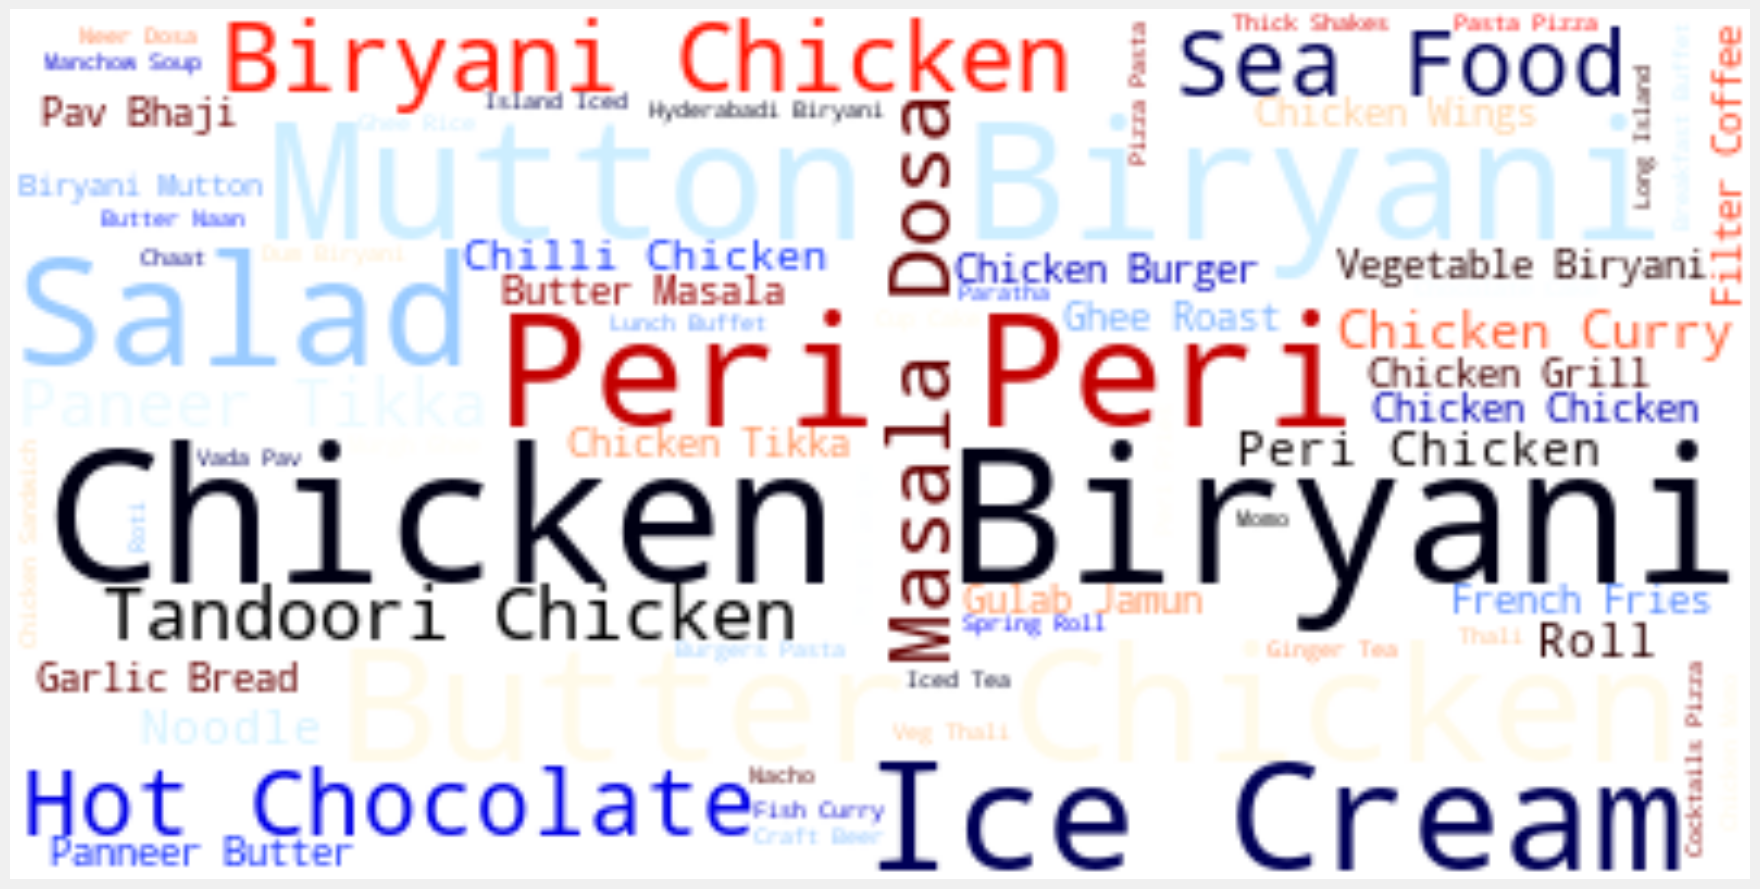

In [262]:
plt.figure(figsize=(20,15))


wordcloud1 = WordCloud(max_font_size = 50,max_words = 100, background_color = "white",stopwords = stopwords,colormap = "flag").generate(text)

plt.plot()
plt.imshow(wordcloud1,interpolation= "bilinear")
plt.axis("off")
plt.show()

In [259]:
wordcloud1

In [270]:
def generate_wordcloud(rest_type):
    df_wd = df[df["rest_type"]==rest_type]
    text = df_wd["dish_liked"].str.cat(sep =" ").lower()
    stopwords = set(STOPWORDS)
    plt.figure(figsize=(20,15))
    wordcloud1 = WordCloud(max_font_size = 50,max_words = 100, background_color = "white",stopwords = stopwords,colormap = "flag").generate(text)
    plt.plot()
    plt.imshow(wordcloud1,interpolation= "bilinear")
    plt.axis("off")
    plt.show()
    
    
    

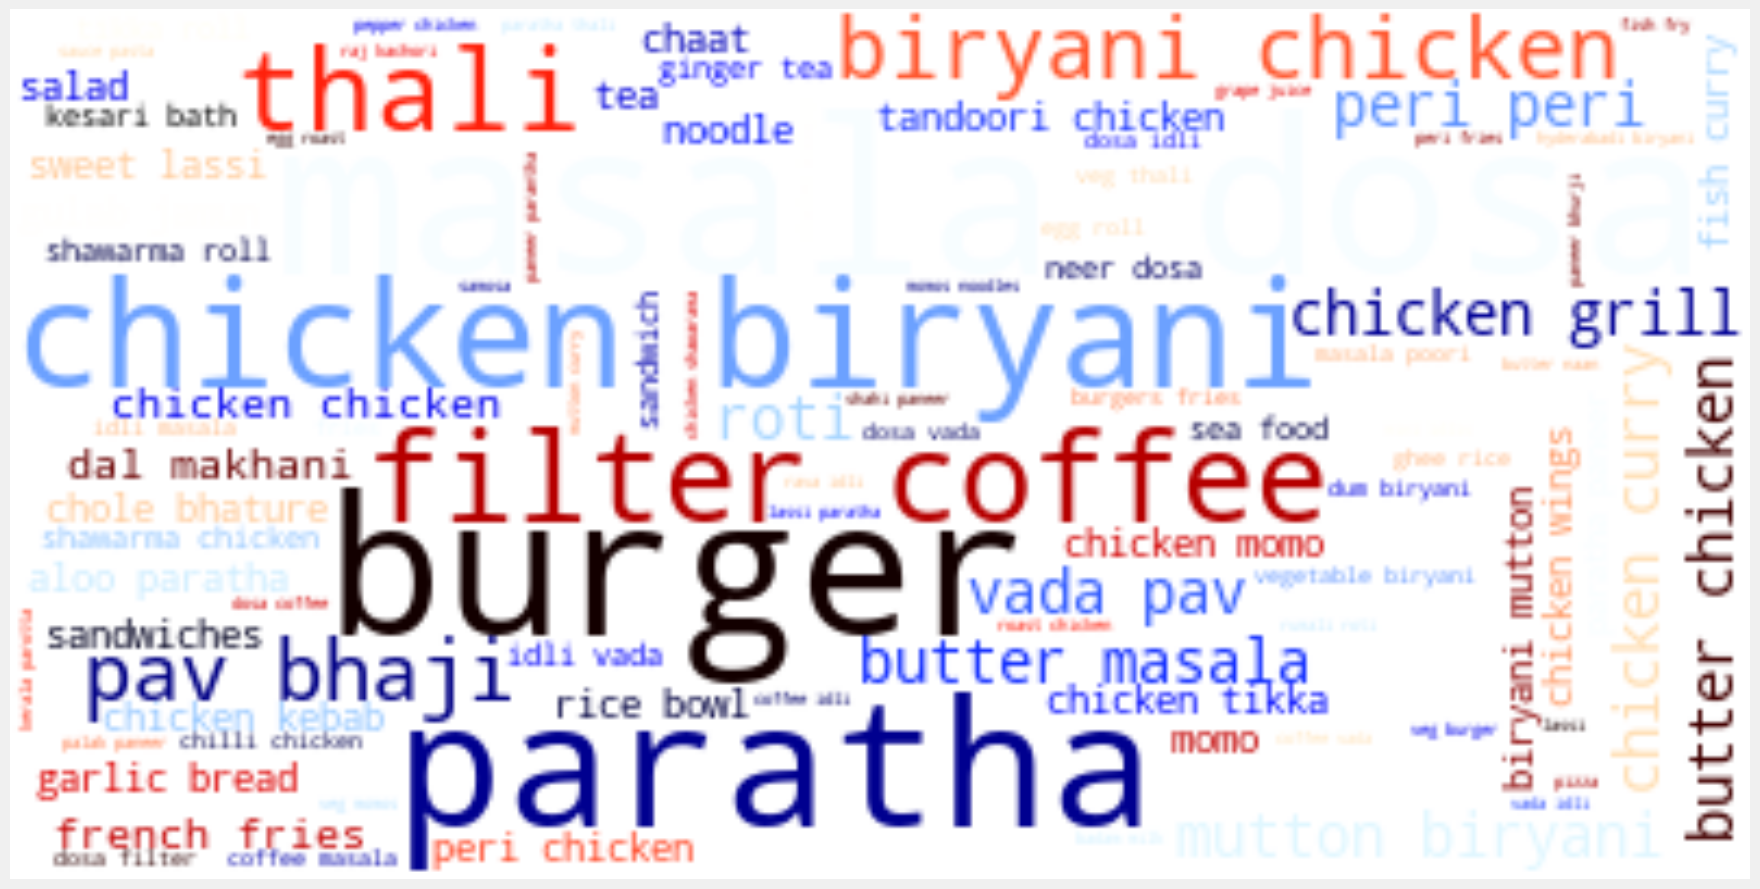

In [271]:
generate_wordcloud("Quick Bites")

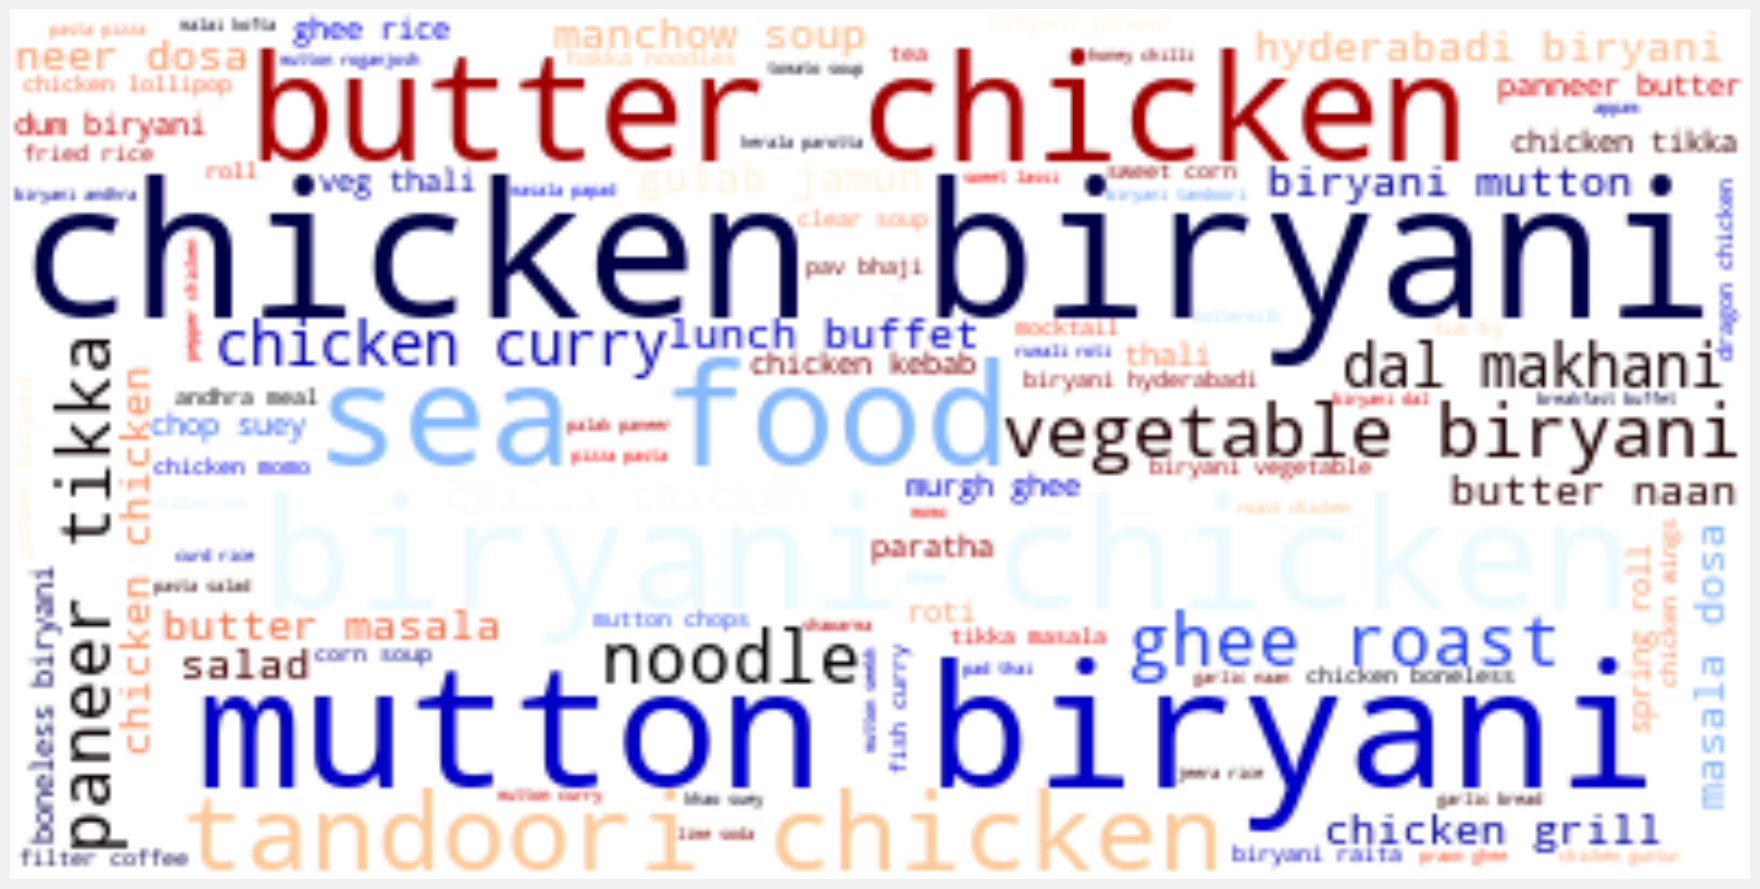

In [272]:
generate_wordcloud("Casual Dining")

In [ ]:
generate_wordcloud("")

In [269]:
df["rest_type"].value_counts()[:10]

rest_type
Quick Bites           15011
Casual Dining          9880
Cafe                   3491
Dessert Parlor         1925
Delivery               1781
Takeaway, Delivery     1458
Casual Dining, Bar     1123
Bakery                  775
Beverage Shop           704
Bar                     650
Name: count, dtype: int64